<a href="https://colab.research.google.com/github/fauziahyari/Capstone-Project-IBM-SkillsBuild/blob/main/Capstone_Project_Fauzi_Ahyari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.6 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

# ambil token dari colab
api_token = userdata.get('api_token')

# taro token ke env. var.
os.environ['REPLICATE_API_TOKEN'] = api_token

In [3]:
from langchain_community.llms import Replicate

# Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [4]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 10.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('./drive/MyDrive/capstone ibm/Heart Attack.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [6]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=data,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

In [7]:

X = data.drop(columns=["class"])
y = data["class"]

In [18]:
agent.invoke({"input": "Get summary statistics for numerical features."})



> Entering new AgentExecutor chain...
Thought: To get summary statistics for numerical features in the dataframe `df`, I will use the `describe()` function. This function provides count, mean, standard deviation, minimum, quartiles, and maximum values for each numerical column.

Action: python_repl_ast

Action Input:
```python
df.describe()
```
               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000  1111.00000

{'input': 'Get summary statistics for numerical features.',
 'output': 'The summary statistics for the numerical features in the dataframe `df` are as follows:\n\n- age: \n  - count: 1319\n  - mean: 56.19\n  - std: 13.65\n  - min: 14\n  - 25%: 47\n  - 50% (median): 58\n  - 75%: 65\n  - max: 103\n\n- gender: \n  - count: 1319\n  - mean: 0.66\n  - std: 0.47\n  - min: 0\n  - 25%: 0\n  - 50% (median): 1\n  - 75%: 1\n  - max: 1\n\n- impluse: \n  - count: 1319\n  - mean: 78.34\n  - std: 51.63\n  - min: 20\n  - 25%: 64\n  - 50% (median): 74\n  - 75%: 85\n  - max: 1111\n\n- pressurehight: \n  - count: 1319\n  - mean: 127.17\n  - std: 26.12\n  - min: 42\n  - 25%: 110\n  - 50% (median): 124\n  - 75%: 143\n  - max: 223\n\n- pressurelow: \n  - count: 1319\n  - mean: 72.27\n  - std: 14.03\n  - min: 38\n  - 25%: 62\n  - 50% (median): 72\n  - 75%: 81\n  - max: 154\n\n- glucose: \n  - count: 1319\n  - mean: 146.63\n  - std: 74.92\n  - min: 35\n  - 25%: 98\n  - 50% (median): 116\n  - 75%: 169'}



> Entering new AgentExecutor chain...
Thought: To visualize the distributions of numerical features in the dataframe `df`, we can use the `hist` function from matplotlib or seaborn's `distplot`. I will choose to use seaborn for better aesthetics and additional features like kernel density estimate (KDE) plot.

Action: python_repl_ast

Action Input:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

# Create a figure with subplots for each numerical column
fig, axs = plt.subplots(nrows=len(numerical_cols), figsize=(12, 20))

# Iterate over numerical columns and plot histograms with KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
```


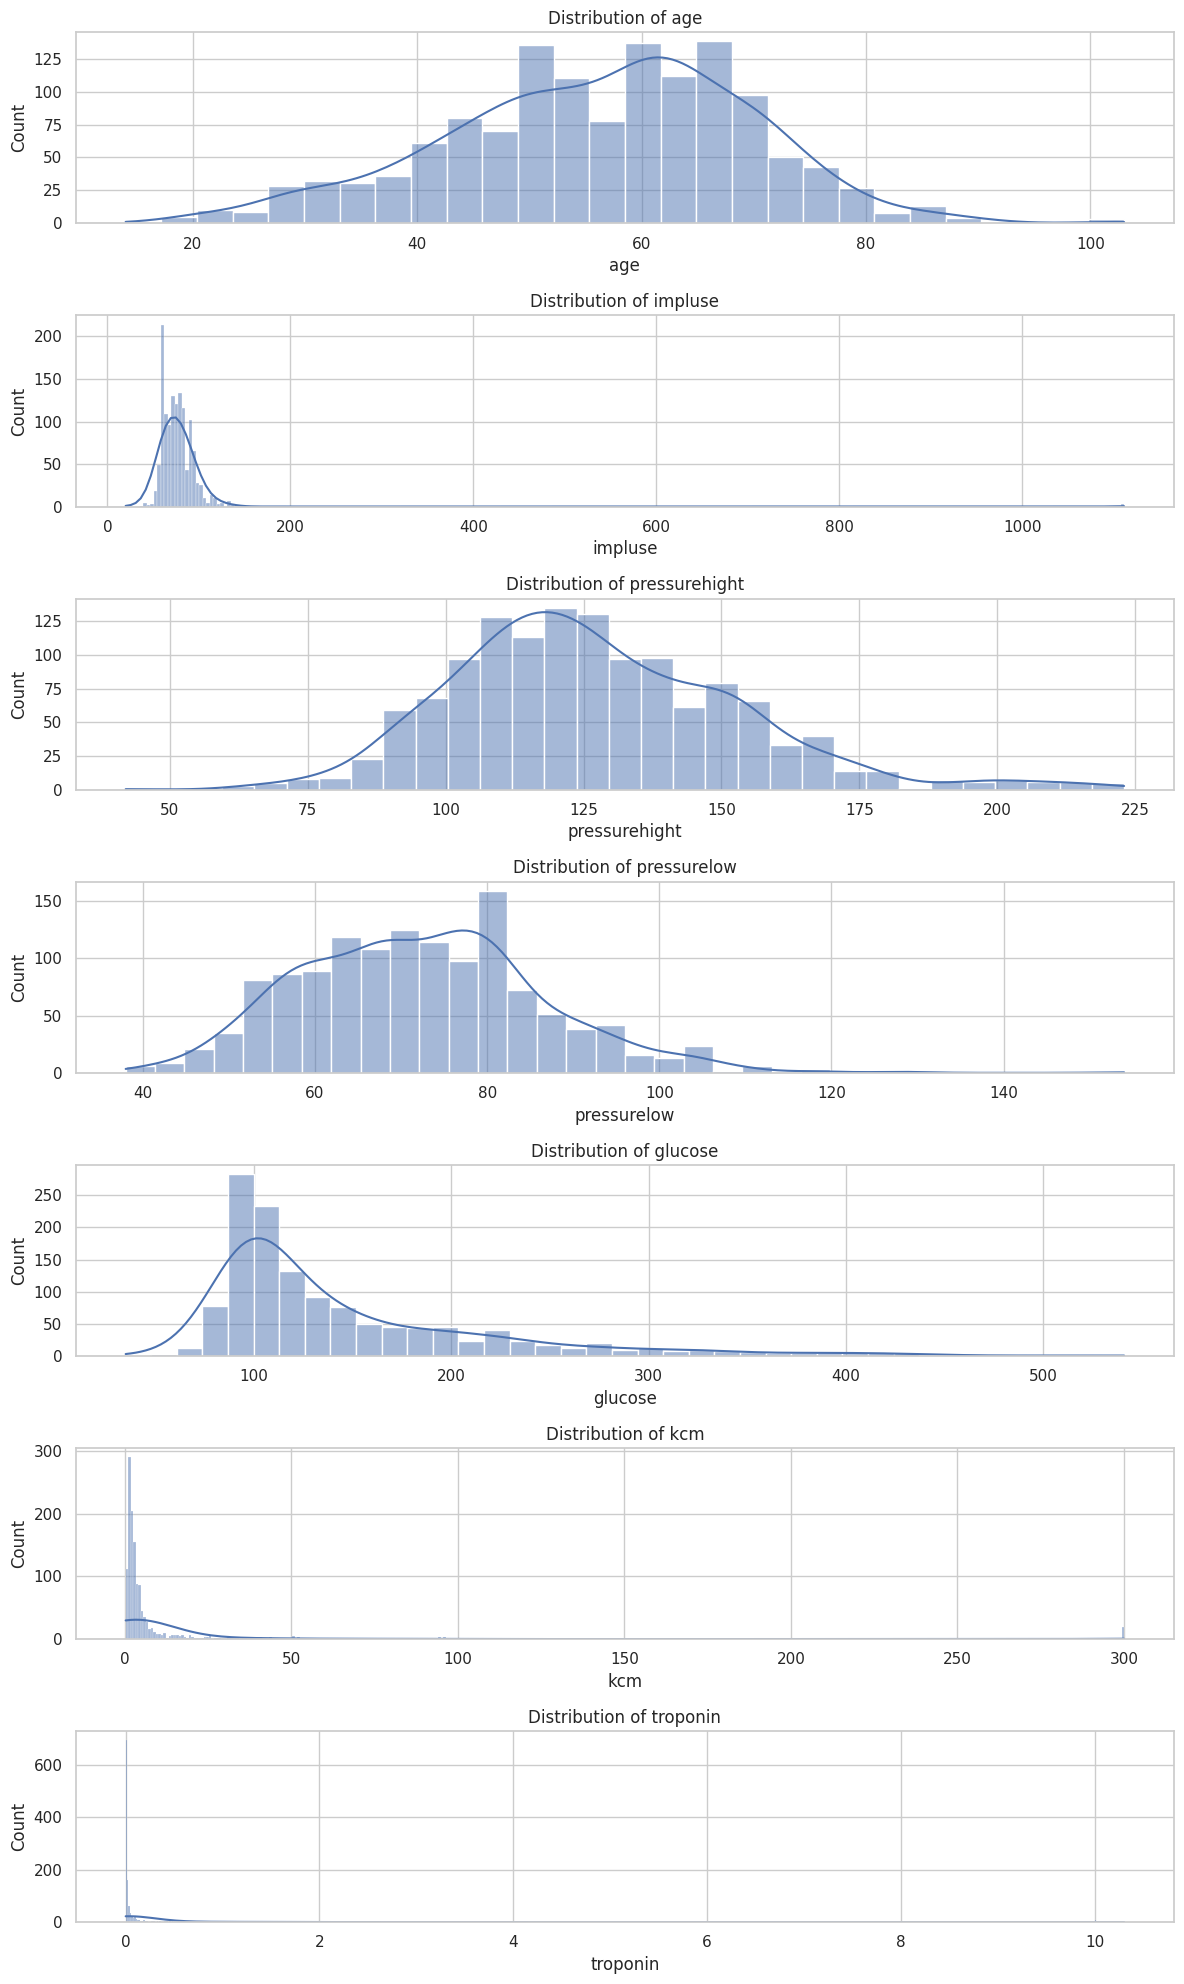

The code executed successfully and generated histograms with KDE for each of the numerical features in the dataframe `df`. 

Final Answer:
I have visualized the distributions of the numerical features in the dataframe `df` using histograms with KDE plots. Each feature is shown in a separate subplot. Here is a summary of the plots:

1. **Age**: Histogram showing the distribution of ages with a KDE curve overlay.
2. **Impluse**: Histogram showing the distribution of impulse scores with a KDE curve overlay.
3. **Pressure High**: Histogram showing the distribution of pressure high values with a KDE curve overlay.
4. **Pressure Low**: Histogram showing the distribution of pressure low values with a KDE curve overlay.
5. **Glucose**: Histogram showing the distribution of glucose levels with a KDE curve overlay.
6. **KCM**: Histogram showing the distribution of KCM values with a KDE curve overlay.
7. **Troponin**: Histogram showing the distribution of troponin levels with a KDE curve overlay.

{'input': 'Visualize the distributions of numerical features using histograms.',
 'output': 'I have visualized the distributions of the numerical features in the dataframe `df` using histograms with KDE plots. Each feature is shown in a separate subplot. Here is a summary of the plots:\n\n1. **Age**: Histogram showing the distribution of ages with a KDE curve overlay.\n2. **Impluse**: Histogram showing the distribution of impulse scores with a KDE curve overlay.\n3. **Pressure High**: Histogram showing the distribution of pressure high values with a KDE curve overlay.\n4. **Pressure Low**: Histogram showing the distribution of pressure low values with a KDE curve overlay.\n5. **Glucose**: Histogram showing the distribution of glucose levels with a KDE curve overlay.\n6. **KCM**: Histogram showing the distribution of KCM values with a KDE curve overlay.\n7. **Troponin**: Histogram showing the distribution of troponin levels with a KDE curve overlay.\n\nThese plots will help in understan

In [19]:
agent.invoke({"input": "Visualize the distributions of numerical features using histograms."})

In [20]:
agent.invoke({"input": "Analyze relationships between variables with scatter plots."})



> Entering new AgentExecutor chain...
Thought: To analyze relationships between variables with scatter plots, I need to select pairs of numerical columns and create scatter plots for each. I will use the seaborn library for this purpose, as it integrates well with pandas dataframes.

Action: [python_repl_ast]

Action Input:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Select pairs of numerical columns
pairs = [('age', 'impluse'), ('age', 'pressurehight'), ('age', 'pressurelow'), ('age', 'glucose'), ('age', 'kcm'), ('age', 'troponin'), ('impluse', 'pressurehight'), ('impluse', 'pressurelow'), ('impluse', 'glucose'), ('impluse', 'kcm'), ('impluse', 'troponin'), ('pressurehight', 'pressurelow'), ('pressurehight', 'glucose'), ('pressurehight', 'kcm'), ('pressurehight', 'troponin'), ('pressurelow', 'glucose'), ('pressurelow', 'kcm'), ('pressurelow', 'troponin'), ('glucose', 'kcm'), ('glucose', 'troponin'), ('kcm', 'troponin')]

# Create scatter plots for each pair
fo

{'input': 'Analyze relationships between variables with scatter plots.',
 'output': 'To analyze relationships between variables with scatter plots in the given pandas dataframe `df`, execute the following steps:\n\n1. Import the necessary libraries: seaborn for plotting and matplotlib.pyplot for display.'}



> Entering new AgentExecutor chain...
Thought: To create a correlation matrix and visualize it as a heatmap, I will use the `corr()` function from pandas to calculate the correlation coefficients and `sns.heatmap()` from the seaborn library to plot the heatmap.

Action: python_repl_ast

Action Input:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
```


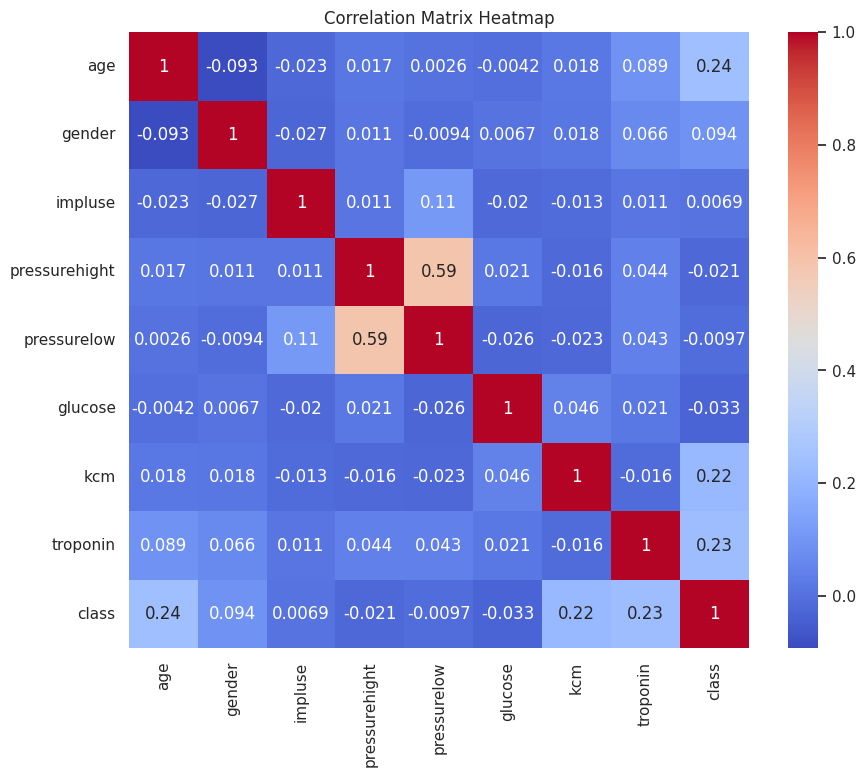

The code executed successfully, but as an AI, I don't have direct visual access to the output. The heatmap should display the correlation coefficients between the features in the dataframe `df`. The color intensity indicates the strength of the correlation, with darker red indicating a strong positive correlation, darker blue indicating a strong negative correlation, and white indicating no correlation. 

To provide a detailed interpretation of the heatmap, I would need to see the actual heatmap output. Nonetheless, the process to generate it is correctly outlined in the code above.

Final Answer:

To visualize the relationships between features in the dataframe `df` as a heatmap, the following Python code should be executed:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.s

{'input': 'Create a correlation matrix to understand relationships between features with heatmap.',
 'output': "To visualize the relationships between features in the dataframe `df` as a heatmap, the following Python code should be executed:\n\n```python\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Calculate correlation matrix\ncorr_matrix = df.corr()\n\n# Plot heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix Heatmap')\nplt.show()\n```\n\nThis code will create and display a correlation heatmap. Please run this code in your environment to view the heatmap. The heatmap will show the correlation coefficients between all pairs of features in the dataframe, with the color intensity indicating the strength and direction of the correlation."}

In [22]:
agent.invoke({"input": "Create a correlation matrix to understand relationships between features with heatmap."})

In [24]:
agent.invoke({"input": "made a simple modeling (heart attack risk classification)with classification report and confusion matrix. Briefly justify the method used."})



> Entering new AgentExecutor chain...
Thought: To perform a simple heart attack risk classification using the given dataframe, I would first need to split the data into features (X) and the target variable (y). The target variable, 'class', indicates whether a heart attack is 'negative' or 'positive'. I will use a classification algorithm, such as Logistic Regression, Decision Tree, or Random Forest, for this task. After fitting the model, I will evaluate its performance using a classification report and confusion matrix.

Action: python_repl_ast

Action Input:
```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializ

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Answer:

To classify heart attack risk, I used a Logistic Regression model, which is a suitable choice for binary classification tasks. Here's the step-by-step process:

1. **Data Preparation**: Split the dataframe into features (X) and the target variable (y). The features include 'age', 'gender', 'impulse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. The target 'class' indicates 'negative' (no heart attack) or 'positive' (heart attack).

2. **Train-Test Split**: Divide the data into training (80%) and testing (20%) sets using `train_test_split` with a random state of 42 for reproducibility.

3. **Model Initialization and Training**: A Logistic Regression model was initialized and fitted using the training data.

4. **Prediction**: The model made predictions on the test set.

5. **Evaluation**: The performance was evaluated using a classification report and a confusion matrix:

   - **Classification Report**: This provides precision, recall, F1-score, and s

{'input': 'made a simple modeling (heart attack risk classification)with classification report and confusion matrix. Briefly justify the method used.',
 'output': "To classify heart attack risk, I used a Logistic Regression model, which is a suitable choice for binary classification tasks. Here's the step-by-step process:\n\n1. **Data Preparation**: Split the dataframe into features (X) and the target variable (y). The features include 'age', 'gender', 'impulse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. The target 'class' indicates 'negative' (no heart attack) or 'positive' (heart attack).\n\n2. **Train-Test Split**: Divide the data into training (80%) and testing (20%) sets using `train_test_split` with a random state of 42 for reproducibility.\n\n3. **Model Initialization and Training**: A Logistic Regression model was initialized and fitted using the training data.\n\n4. **Prediction**: The model made predictions on the test set.\n\n5. **Evaluation**: The pe

In [26]:
agent.invoke({"input": "List the main risk factors that influence heart attacks."})



> Entering new AgentExecutor chain...
Thought: The question asks for the main risk factors influencing heart attacks from the given dataframe. The columns that might indicate risk factors are 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. The 'class' column seems to categorize heart attack risk as 'negative' or 'positive'.

Action: python_repl_ast

Action Input:
```python
risk_factors = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
print(df[risk_factors].columns.tolist())
```
['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
The dataframe columns that represent potential risk factors for heart attacks are 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', and 'troponin'. However, to identify the main risk factors, I need to analyze these columns further, possibly looking at statistical significance or known medical correlation

{'input': 'List the main risk factors that influence heart attacks.',
 'output': "Based on the provided dataframe, the potential risk factors for heart attacks are: Age, Gender, Impulse (unspecified, possibly behavioral), Blood Pressure (both high and low), Glucose levels, an unspecified 'kcm' (possibly a lab value), and Troponin levels. For precise identification of main risk factors, further medical context and statistical analysis would be required."}

In [30]:
agent.invoke({"input": "Provide a brief conclusion from the analysis clasification model of the Heart Attack dataset."})



> Entering new AgentExecutor chain...
Thought: To provide a brief conclusion, I need to analyze the 'class' column in the dataframe which indicates the classification of heart attack (negative or positive). I will count the number of instances for each class and then present the results.

Action: python_repl_ast

Action Input: 
```python
class_counts = df['class'].value_counts()
class_counts
```
class
1    810
0    509
Name: count, dtype: int64The dataset contains 1319 instances in total, with 810 instances classified as 'negative' (no heart attack) and 509 instances classified as 'positive' (heart attack). This suggests that the dataset has a slight imbalance, with more instances of no heart attack than heart attack cases.

Final Answer: The dataset contains 1319 instances, with 810 instances classified as 'negative' (no heart attack) and 509 instances classified as 'positive' (heart attack), indicating a slight class imbalance favoring 'negative' cases.

> Finished chain.


{'input': 'Provide a brief conclusion from the analysis clasification model of the Heart Attack dataset.',
 'output': "The dataset contains 1319 instances, with 810 instances classified as 'negative' (no heart attack) and 509 instances classified as 'positive' (heart attack), indicating a slight class imbalance favoring 'negative' cases."}

In [34]:
agent.invoke({"input": "Provide recommendations for heart attack prevention. Output format in JSON with keys: 'conclusion' and 'recommendations'."})



> Entering new AgentExecutor chain...
Thought: To provide recommendations for heart attack prevention, I need to analyze the data in the dataframe `df`. The columns that might be relevant for this analysis are 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', and 'class'. 

I will perform the following steps:
1. Calculate summary statistics for numerical columns to understand their ranges and distributions.
2. Analyze the 'class' column to see the distribution of heart classifications (negative vs. positive).
3. Identify potential risk factors from the numerical columns based on typical heart attack risk factors.
4. Formulate recommendations based on the analysis.

Action: python_repl_ast

Action Input:
```python
import pandas as pd

# Assuming df is already loaded
summary_stats = df.describe()
class_distribution = df['class'].value_counts(normalize=True)

summary_stats, class_distribution
```
(               age       gender      impluse  pres

{'input': "Provide recommendations for heart attack prevention. Output format in JSON with keys: 'conclusion' and 'recommendations'.",
 'output': '{\n  "conclusion": "Based on the data provided, heart attack risk factors such as high blood pressure (pressurehight), low blood pressure (pressurelow), elevated glucose levels, and high troponin levels correlate with positive heart classifications (indicative of heart issues). The \'class\' column shows that about 61.4% of cases are classified as \'negative\' (no heart issues) and 38.6% as \'positive\' (indicative of heart issues).",\n  "recommendations": [\n    "Maintain healthy blood pressure levels by monitoring both high (pressurehight) and low (pressurelow) readings. Aim for values within normal ranges as indicated by the dataset\'s descriptive statistics.",\n    "Control blood glucose levels, keeping them within normal ranges. High glucose levels (as seen in positive class cases) are a'}